## Descriptive and Inferential Statistics

In [1]:
import math
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Statistics: collecting data, analyzing data to discover findings, using data to predict what causes those findings

**ASK WHERE DATA COMES FROM** <br>
data is just snapshots. **DATA PROVIDES CLUES, NOT TRUTH** <br>
data can be biased (missing variables, missing important representation) <br>
keep data objectives focused (gather what is relevant and complete) <br>

Descriptive statistics: summarizes data <br>
Inferential statistics: attempts to uncover attributes of a larger population

Population: a particular group of interest <br>
Sample: subset of a population <br>
Bias: skews findings by over-representing a certain group <br>
1. Confirmation bias: only collecting data that supports a certain belief or hypothesis
2. Self-selection bias: occurs when a specific group is more likely to include itself in the sample
3. Survival bias: only captures surviving subjects, while deceased are unaccounted for

Overcome bias with random selection <br>
scrutinize data collection processes for possible bias

Confounding variables: unaddressed, unmeasured, or possibly influential variables
    

In [2]:
# mean (average of a set of values)
sample = [1,3,2,5,7,0,2,3]
mean = sum(sample) / len(sample)
print(mean)

2.875


In [3]:
# weighted mean (mean, but some values are given more importance)
sample = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]
weighted_mean = sum(s*w for s,w in zip(sample, weights)) / sum(weights)
print(weighted_mean)

81.4


means are more sensitive to outliers (when compared to median or mode)

In [4]:
# median (middlemost value)
sample = [0,1,5,7,9,10,14]
def median(values):
    ordered = sorted(values)
    n = len(ordered)
    mid = n//2 if n%2 else n//2-1
    if n%2:
        return ordered[mid]
    else:
        return (ordered[mid] + ordered[mid+1]) / 2.0

print(median(sample))

7


quantile: like median, splitting the data based on # of observations (quartiles split data into 4 groups - 25%, 50%, 75%, 100%)

In [5]:
# mode (most common value)
# unimodal and multimodal
sample = [1,3,2,5,7,0,2,3]
def mode(values):
    counts = dict()
    for s in values:
        counts[s] = counts.get(s, 0)+1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print(mode(sample))

[2, 3]


mode is useful when data is repetitive

Variance:

$ \sigma^2 = \frac{\Sigma(x_i - \mu)^2}{N} $

In [6]:
# variance (sum of squared differences between data points and mean)
data = [0,1,5,7,9,10,14]
def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v-mean)**2 for v in values) / len(values)
    return _variance

print(variance(data))

21.387755102040813


Standard deviation:

$ \sigma = \sqrt{\frac{\Sigma(x_i - \mu)^2}{N}} $

In [7]:
# standard deviation (average difference between data points and mean)
data = [0,1,5,7,9,10,14]
def std_dev(values):
    return math.sqrt(variance(values))

print(std_dev(data))

4.624689730353898


Variance & Standard Deviation of a sample:

$ s^2 = \frac{\Sigma(x_i - \mu)^2}{n-1} $

$ s = \sqrt{\frac{\Sigma(x_i - \mu)^2}{n-1}} $

samples tend to underestimate the variance in the population, and so the sample formulas divide by $n-1$ instead of $n$ to increase variance and capture greater uncertainty about the population.

In [8]:
# variance and standard deviation for a sample
def variance(values, is_sample: bool = False):
    mean = sum(values) / len(values)
    _variance = (
        sum((v-mean)**2 for v in values) /
        (len(values) - (1 if is_sample else 0))
    )

    return _variance

def std_dev(values, is_sample: bool = False):
    return math.sqrt(variance(values, is_sample))

print(f"VARIANCE = {variance(data, is_sample=True)}")
print(f"STD DEV = {std_dev(data, is_sample=True)}")

VARIANCE = 24.95238095238095
STD DEV = 4.99523582550223


Normal (Gaussian) distribution: symmetrical, bell-shaped distribution with most mass around the mean and spread defined by standard deviation

Standard normal distribution: Normal distribution with mean 0 and standard deviation 1

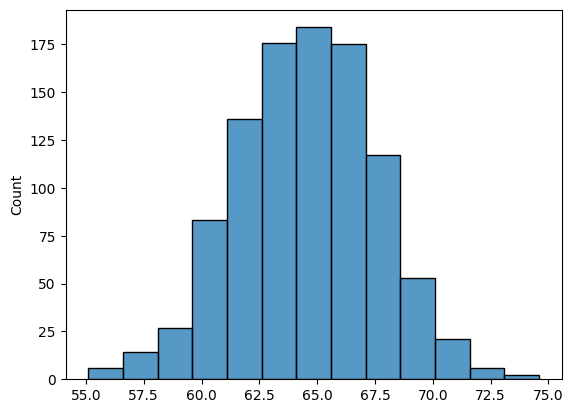

In [9]:
# normal distribution (histogram)
data = np.array([
        scipy.stats.norm.ppf(
            random.uniform(0.0, 1.0),
            loc= 64.43,
            scale= 2.99
        ) for i in range(1000)
])

sns.histplot(data= data, binwidth= 1.5);

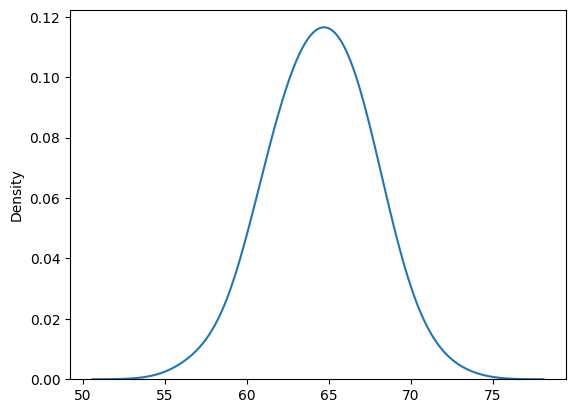

In [10]:
# normal distribution (density)
sns.kdeplot(data= data, bw_adjust= 2);

Probability density function that creates a normal distribution:

$ \mathrm{pdf}(x, \mu, \sigma) = {1 \over \sigma}\sqrt{2\pi}e^{-{1 \over 2}}(\frac{x - \mu^2}{\sigma}) $

Probability density function returns a likelihood

Cumulative density function: given a range and distribution, finds the probability of a random observation being within that range

$ \mathrm{cdf}(\beta, \alpha, \mu, \sigma) = \int\limits_\beta^\alpha \mathrm{pdf}(x, \mu, \sigma)\mathrm{d}x $, where

$ \alpha $ = upper bound, <br>
$ \beta $ = lower bound, <br>
$ \mu $ = mean, and <br>
$ \sigma $ = standard deviation

CDF is a sigmoid curve

In [11]:
# cumulative distribution
mu = 64.43
sigma = 2.99

x = scipy.stats.norm.cdf(64.43, mu, sigma)
print(x)

0.5


In [12]:
# probability between 62 and 66
x = scipy.stats.norm.cdf(66, mu, sigma) - scipy.stats.norm.cdf(62, mu, sigma)
print(x)

0.4920450147062894


Inverse CDF: given a probability (with no lower bound) and distribution, finds the upper bound

In [13]:
# inverse CDF
x = scipy.stats.norm.ppf(0.95, loc= 64.43, scale= 2.99)
print(x)

69.3481123445849


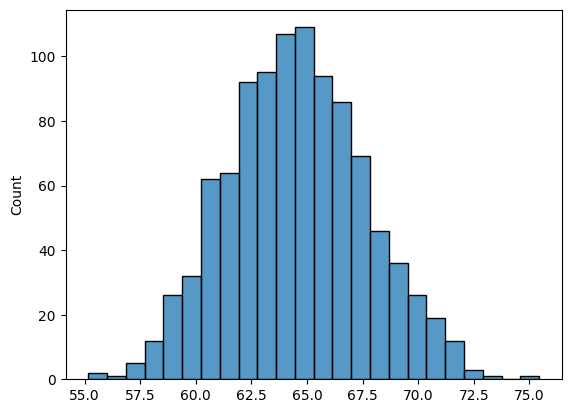

In [14]:
# inverse CDF can also generate realistic (but synthetic) values within a distribution
synthetic_data = []
for i in range(0, 1000):
    random_p = random.uniform(0.0, 1.0)
    random_data_point = scipy.stats.norm.ppf(random_p, loc=64.43, scale = 2.99)
    synthetic_data.append(random_data_point)

sns.histplot(data=synthetic_data);

z-score: standardizes any value in a normal distribution to a standard normal distribution <br>
z-scores are good for comparing data points with different (normal) distributions.

$ z = \frac{x - \mu}{\sigma} $

In [15]:
# z score
def z_score(x, mean, std):
    return (x - mean) / std

mean = 140000
std_dev = 3000
x = 150000

print(z_score(x, mean, std_dev))

3.3333333333333335


coefficient of variation: standardizes the standard deviation

$ \mathrm{cv} = {\sigma \over \mu} $

In [16]:
# coefficient of variation
def coeff_variation(mean, std):
    return std / mean

print(coeff_variation(mean, std_dev))

0.02142857142857143


Central limit theorem: the distributions of sample means for any population, no matter how strange or imbalanced the population distribution, as the sample size increases:
1. The distribution of sample means appears more normal.
2. The mean of sample means approaches the population mean.
3. The sample standard deviation approaches the population standard deviation divided by the square root of the sample size, $ s = {\sigma \over \sqrt{n}} $

If the population is normal, the sample means will be normal no matter the sample size.

For multimodal or highly imbalanced population distributions, a larger sample size (>31) is necessary to see a normal distribution appear in the sample means.

For sample sizes smaller than 31, rely on the T-distribution rather than the normal distribution for statistical calculations.

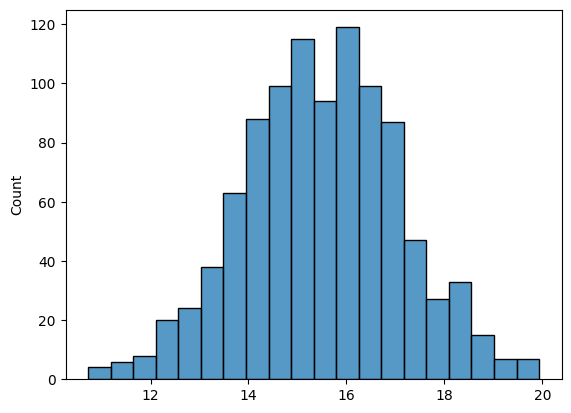

In [17]:
# central limit theorem
sample_size = 31
sample_count = 1000

means = np.array([
    sum([random.uniform(0.0, 1.0) for i in range(sample_size)])
    for i in range(sample_count)
])

sns.histplot(data= means, bins=20);

Confidence interval: how confidently we believe that a range around our sample mean contains the population mean.

$ \mathrm{CI} = \mu \pm E = \mu \pm z_c{s \over \sqrt{n}}$, where

$ \mathrm{CI} $ is the confidence interval, <br>
$ \mu $ is the sample mean, <br>
$ E $ is the margin of error, <br>
$ s $ is the sample standard deviation, <br>
$ n $ is the sample size, and <br>
$ z_c $ is the z-score from an inverse CDF of a standard normal distribution for probability $p$ where $p$ is $\alpha$ (the level of confidence).


Confidence intervals often confuse junior statisticians because a confidence is *not* a probability. 

We are *not* saying: There is a 95% chance that our confidence interval contains the population mean.
We are saying: If an infinite number of experiments were done like ours (collecting samples, then calculating the mean and confidence interval for each) then 95% of the experiments would have confidence intervals that contained the true population mean.

The difference comes from a frequentist vs bayesian approach to statistics, where the frequentist approach is based solely on data, while the bayesian approach is based on prior knowledge and updating probabilities as data is gathered.

The bayesian approach, called a credible interval, is closer to what we are *not* saying about a confidence interval - that the range we propose has a 95% probability of containing the true population mean - but the calculation (and indeed the entire experiment) is constructed and calculated differently than a confidence interval.

Fundamentally:

Confidence intervals treat the interval as the random variable, and the population mean as the fixed value, and
Credible intervals treat the population mean as the random variable, and the interval as the fixed value

In [18]:
# confidence intervals
def critical_z_value(p):
    norm_dist = scipy.stats.norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    right_tail_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(right_tail_area)

def confidence_interval(p, sample_mean, sample_std, n):
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / math.sqrt(n))
    upper_ci = upper * (sample_std / math.sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=0.95, sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


p-value: probability (or rarer) of something occurring by chance rather than some (hypothesized) explanation.

an alpha value (probability) is set before performing the experiment, and should the alpha exceed the p-value, then the result is considered to be *statistically significant*.

Hypothesis testing: comparing results of an affected group to a population (or control) group. A null hypothesis indicates that there was no change in the affected group, and an alternative hypothesis indicates that there *was* a change in the affected group.

In hypothesis tests, it is impossible to confirm the null hypothesis. Indeed, it is impossible to confirm the alternative hypothesis. Rather, if the results prove statistically significant, we *reject* the null hypothesis *in favor of* the alternative hypothesis (the results favor the alternative, which is the closest thing to "proof" that we can achieve). If the results *do not* prove statistically significant, we *fail to reject* the null hypothesis (which does not confirm the null hypothesis is true. It *can* mean that the null hypothesis is true, or it *can* mean that we do not have enough evidence in favor of the alternative hypothesis.)

In [19]:
# hypothesis testing
mean = 18
std_dev = 1.5
lower = scipy.stats.norm.ppf(0.025, mean, std_dev)
upper = scipy.stats.norm.ppf(0.975, mean, std_dev)

x = scipy.stats.norm.cdf(upper, mean, std_dev) - \
    scipy.stats.norm.cdf(lower, mean, std_dev)

print(lower)
print(upper)
print(x)

15.060054023189918
20.93994597681008
0.95


One-tailed test: framing hypothesis test in a single direction

$H_0: \mu \geq \overline{\mu}$ <br>
$H_1: \mu < \overline{\mu}$, where

$H_0$ is the null hypothesis, <br>
$H_1$ is the alternative hypothesis, <br>
$ \mu $ is the sample mean, and <br>
$ \overline{\mu} $ is the population mean

In [20]:
# one tailed
x = scipy.stats.norm.ppf(0.05, mean, std_dev)
print(x)
test_val = 16
p_value = scipy.stats.norm.cdf(test_val, mean, std_dev)
print(p_value)

15.53271955957279
0.09121121972586788


Two-tailed test: framing hypothesis test in both directions

$H_0: \mu = \overline{\mu}$ <br>
$H_1: \mu \neq \overline{\mu}$, where

$H_0$ is the null hypothesis, <br>
$H_1$ is the alternative hypothesis, <br>
$ \mu $ is the sample mean, and <br>
$ \overline{\mu} $ is the population mean

Two-tailed tests are often favored because they require more decisive results (for alpha 0.95, p-value must be below 0.025 or exceed 0.975 rather than just being below 0.05), and they can also be used to reject the null hypothesis in the opposite direction of expectation (for example, that a drug actually hindered recovery instead of improved it).

In [21]:
# two tailed
x1 = scipy.stats.norm.ppf(0.025, mean, std_dev)
x2 = scipy.stats.norm.ppf(0.975, mean, std_dev)
upper_test_val = mean + (abs(mean - test_val))
p1 = scipy.stats.norm.cdf(test_val, mean, std_dev)
p2 = 1 - scipy.stats.norm.cdf(upper_test_val, mean, std_dev)
print(p1 + p2)

0.18242243945173575


**Beware of p-hacking!** Do not shop for statistically significant values.

This is easy to do with big data, especially in model tuning, where the model stumbles across a strong accuracy/validation score purely by chance.

T-distribution: like a normal distribution, but has larger tails (greater spread) to reflect more uncertainty

The variance in a T-distribution is measured by its degrees of freedom (in this case, $n-1$)

critical t-value: like a critical z-value, but has a degrees of freedom parameter to reflect greater uncertainty for sample sizes below 30

In [22]:
# T distribution
n = 25
lower = scipy.stats.t.ppf(0.025, df= n-1)
upper = scipy.stats.t.ppf(0.975, df= n-1)
print(lower, upper)

-2.063898561628021 2.0638985616280205


Texas sharpshooter fallacy: firing a gun at a wall, then drawing a circle around the holes. <br>
Observation of an *unpredicted* rare pattern does not have predictive value.

To avoid falling victim to big data fallacies:
1. Use structured hypothesis tests and gather data for a particular objective
2. Obtain fresh data and re-test findings
3. Consider possibility that findings are a coincidence

Understandability and explainability are the next frontiers in statistics and machine learning!

In [23]:
# exercise 1
diameters = [1.78, 1.75, 1.72, 1.74, 1.77]
mean = sum(diameters) / len(diameters)
std_dev = math.sqrt(
    sum([(d - mean)**2 for d in diameters])
    / (len(diameters)-1)
)
print(mean)
print(std_dev)

1.752
0.023874672772626667


In [24]:
# exercise 2
mean = 42
std_dev = 8

result = scipy.stats.norm.cdf(30, mean, std_dev) \
    - scipy.stats.norm.cdf(20, mean, std_dev)

print(result)

0.0638274380338035


In [25]:
# exercise 3
n = 34
mean = 1.715588
std_dev = 0.029252
p = 0.99

crit_z = scipy.stats.norm(loc=0.0, scale=1.0).ppf((1-p)/2.0)
print(crit_z)
conf_upper = mean - (crit_z * (std_dev / math.sqrt(n)))
conf_lower = mean + (crit_z * (std_dev / math.sqrt(n)))
print(conf_lower, conf_upper)

-2.5758293035489004
1.7026658973748656 1.7285101026251342


In [26]:
# exercise 4
mu = 10345.0
sigma = 552.0
n = 45
x_bar = 11641.0

one_tailed = 1 - scipy.stats.norm.cdf(x_bar, mu, sigma)
print(one_tailed)
upper_test_val = mu - abs(x_bar - mu)
two_tailed = (
    one_tailed +
    scipy.stats.norm.cdf(upper_test_val, mu, sigma)
)
print(two_tailed)

0.009441667982480695
0.018883335964961383
